# (Ford Go Bike)
## by (Mahmoud Khaled)

## Preliminary Wrangling

* Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
* This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.
* Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.


In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 286kB 12.5MB/s ta 0:00:01   61% |███████████████████▌            | 174kB 7.1MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.1MB/s eta 0:00:01   12% |████▏                           | 1.5MB 18.6MB/s eta 0:00:01    39% |████████████▋                   | 4.5MB 20.8MB/s eta 0:00:01    48% |███████████████▌                | 5.6MB 18.6MB/s eta 0:00:01    56% |██████████████████▏             | 6.6MB 18.6MB/s eta 0:00:01    73% |███████████████████████▍        | 8.4MB 18.2MB/s eta 0:00:01    81% |██████████████████████████      | 9.4MB 20.0MB/s eta 0:00:01    89% |████████████████████████████▋   | 10.3MB 20.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.4MB/s eta 0:00:01   14% |████▋                           | 1.9MB 20.7MB/s eta 0:00:01    21% |███████                         | 2.9MB 19.2MB/s eta 0:00:01    29% |█████████▍                      | 3.9MB 20.3MB/s eta 0:00:01    43% |█████████████▉          

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [5]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

* 183412 rows x 16 columns
* columns names:
       'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip' 

### What is/are the main feature(s) of interest in your dataset?

> "duration_sec", "start_station_name", "end_station_name", "user_type", "member_birth_year", "member_gender"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  "duration_sec", "user_type", "member_birth_year", "member_gender"

## Data Wrangling

### Only consider the columns we're interested in.

In [9]:
df = df[["duration_sec", "start_station_name", "end_station_name", "user_type", "member_birth_year", "member_gender"]]

### NULL values

In [10]:
#df.isnull().value_counts()

### Duplicates

In [11]:
df.duplicated().value_counts()

False    181756
True       1656
dtype: int64

In [12]:
df = df.drop_duplicates()

### The Trip Duration Outliers

<AxesSubplot:xlabel='duration_sec'>

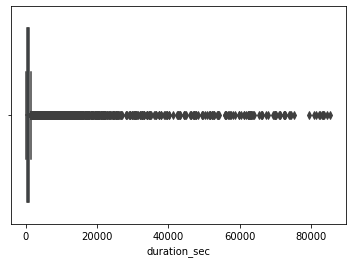

In [13]:
sns.boxplot(df["duration_sec"])

In [14]:
print("The percentage Trip Duration under two hours: " + str(len(df[df["duration_sec"] < 7200]) / len(df) * 100))

The percentage Trip Duration under two hours: 99.60826602698123


As almost 99.7% of the trip durations are under two hours, we'll only consider those for our analysis

In [15]:
df = df[df["duration_sec"] < 7200]

#

### Get `member_age` from `member_birth_year`

In [16]:
df["member_age"] = 2021 - df["member_birth_year"]

In [17]:
df.describe()

,duration_sec,member_birth_year,member_age
count,181044.000000,173012.000000,173012.000000
mean,649.512047,1984.799228,36.200772
std,555.576373,10.121580,10.121580
min,61.000000,1878.000000,20.000000
25%,326.000000,1980.000000,29.000000
50%,514.000000,1987.000000,34.000000
75%,794.000000,1992.000000,41.000000
max,7174.000000,2001.000000,143.000000


### Removing members with age > 100 (Faulty data)

In [18]:
df[df["member_age"]>100]

,duration_sec,start_station_name,end_station_name,user_type,member_birth_year,member_gender,member_age
1285,148,Shattuck Ave at Telegraph Ave,Shattuck Ave at 55th St,Subscriber,1900.0,Male,121.0
10827,1315,Bryant St at 2nd St,Grove St at Masonic Ave,Subscriber,1900.0,Male,121.0
16087,1131,Grove St at Masonic Ave,Folsom St at 3rd St,Subscriber,1900.0,Male,121.0
17981,366,2nd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),Subscriber,1920.0,Male,101.0
18885,432,Montgomery St BART Station (Market St at 2nd St),2nd St at Townsend St,Subscriber,1920.0,Male,101.0
19375,641,Broadway at Battery St,San Francisco Caltrain (Townsend St at 4th St),Customer,1900.0,Male,121.0
21424,1424,Grove St at Masonic Ave,Bryant St at 2nd St,Subscriber,1900.0,Male,121.0
21506,701,San Francisco Caltrain Station 2 (Townsend St...,Broadway at Battery St,Customer,1900.0,Male,121.0
24042,194,Shattuck Ave at Telegraph Ave,Shattuck Ave at 55th St,Subscriber,1900.0,Male,121.0
26133,410,Shattuck Ave at 55th St,MacArthur BART Station,Subscriber,1900.0,Male,121.0


In [19]:
df = df[df["member_age"] < 100]

### Get `duration_min` from `duration_sec`

In [20]:
df["duration_min"] = df["duration_sec"]/60

### Remove `Other` in `member_gender`

In [21]:
df = df[df["member_gender"] != "Other"]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### Question:
How are the trip dutations distributed?

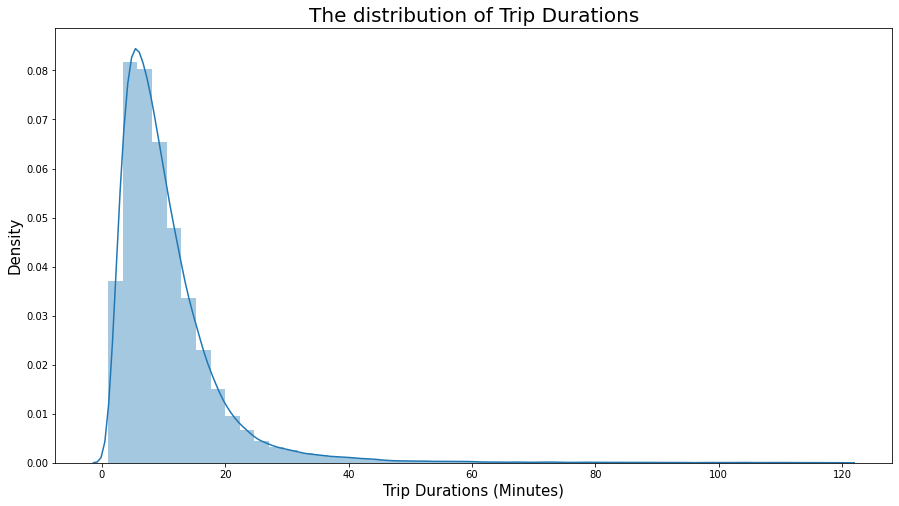

In [22]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.duration_min, ax = ax)
plt.xlabel("Trip Durations (Minutes)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.title("The distribution of Trip Durations", fontsize = 20)
plt.show()

#### Answer: 
The Trips taken into consideration in the above graph are the trips under two hours as they make up around 99.7% of the total Trips. The reason why I choose them is to make the graph more clear and get rid of outliers.

We can see that most trips are around 10 minutes and the majority of trips are under 25 minutes!

#### Question:
How are the member ages distributed?

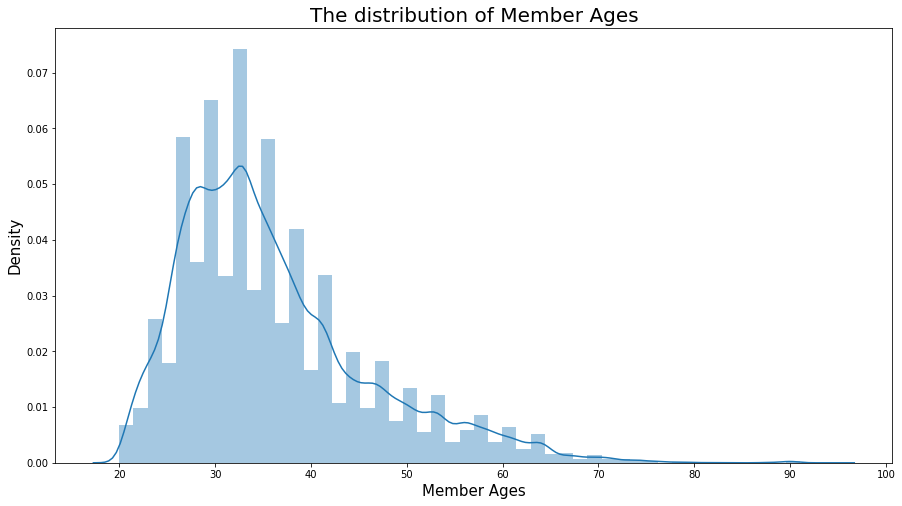

In [23]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.member_age, ax = ax)
plt.xlabel("Member Ages", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.title("The distribution of Member Ages", fontsize = 20)
plt.show()

#### Answer: 
We can see here that the percentage of younger people are higher. Most of the riders are around their 30's

In [24]:
popular_start_stations = df["start_station_name"].value_counts()[:5].to_frame().reset_index().rename(columns = {"index":"start_station_name", "start_station_name":"count"})

In [25]:
popular_start_stations

,start_station_name,count
0,Market St at 10th St,3530
1,San Francisco Caltrain Station 2 (Townsend St...,3346
2,Berry St at 4th St,2881
3,Montgomery St BART Station (Market St at 2nd St),2615
4,Powell St BART Station (Market St at 4th St),2542


#### Question:
What are the most popular start stations

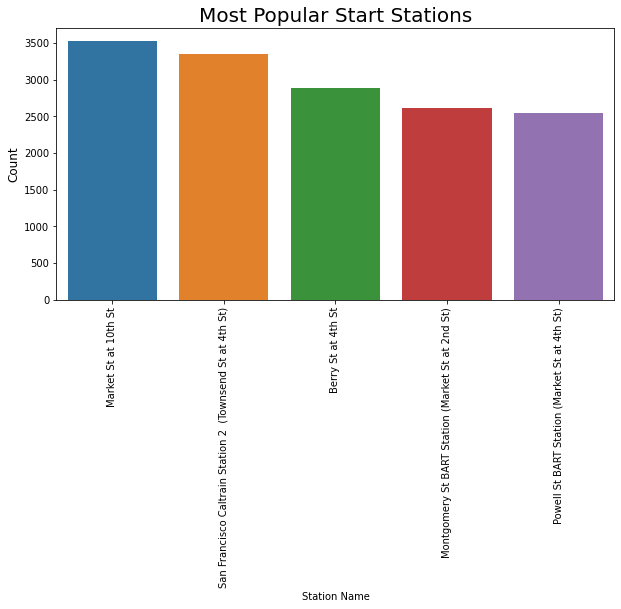

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x='start_station_name', y = "count", data=popular_start_stations)
plt.xlabel("Station Name")
plt.ylabel("Count", fontsize = 12)
plt.title("Most Popular Start Stations", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#### Answer:
* 1- Market St at 10th St 
* 2- San Francisco Caltrain Station 2
* 3- Bery St at 4th St
* 4- Montgomery St BART Station (Market St at 2nd St) 
* 5- Powell St BART Station (Market St at 4th St)

In [27]:
popular_end_stations = df["end_station_name"].value_counts()[:5].to_frame().reset_index().rename(columns = {"index":"end_station_name", "end_station_name":"count"})

In [28]:
popular_end_stations

,end_station_name,count
0,San Francisco Caltrain Station 2 (Townsend St...,4483
1,Market St at 10th St,3604
2,Montgomery St BART Station (Market St at 2nd St),3346
3,San Francisco Ferry Building (Harry Bridges Pl...,3045
4,San Francisco Caltrain (Townsend St at 4th St),2793


#### Question:
What are the most popular end stations?

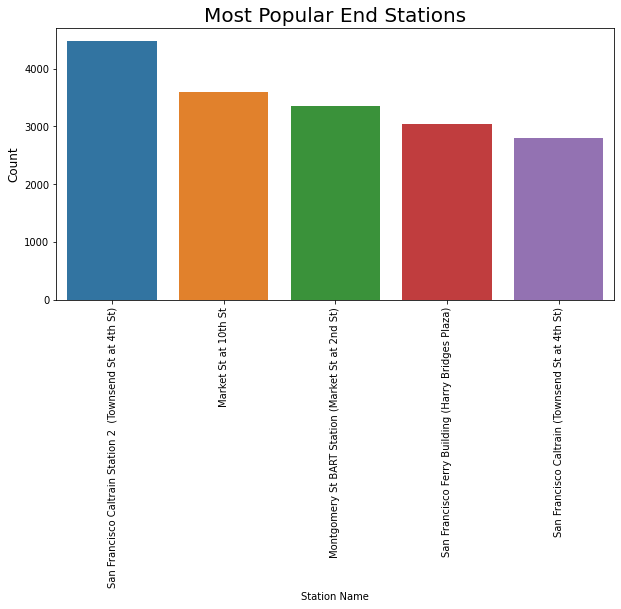

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x='end_station_name', y = "count", data=popular_end_stations)
plt.xlabel("Station Name")
plt.ylabel("Count", fontsize = 12)
plt.title("Most Popular End Stations", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#### Answer: 
* 1- San Francisco Caltrain Station 2 
* 2- Market St at 10th St
* 3- Montgomery St BART Station (Market St at 2nd St) 
* 4- San Francisco Ferry Building
* 5- San Francisco Caltrain (Townsend St at 4th St)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I extracted the age from the birth year, and extracted the 5 most popular start station and end stations. Most popular means they have the most count of trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I used the birth year to extract the age and made two new tables containing the most popular stations. I did this to gain more insights from our data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Question:
What is the relationship between age and trip duration?

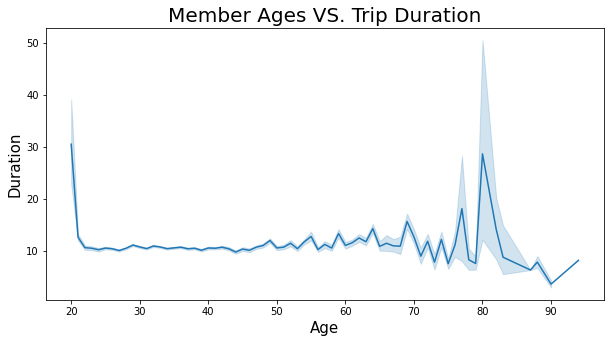

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x="member_age", y = "duration_min", data = df)
plt.title("Member Ages VS. Trip Duration", fontsize = 20)
plt.ylabel("Duration", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

#### Answer:
One interesting observation that I did not expect is people around 80 years old have a higher trip duration than average (around 30 minutes)!

#### Question: 
What is the distribution of males VS females

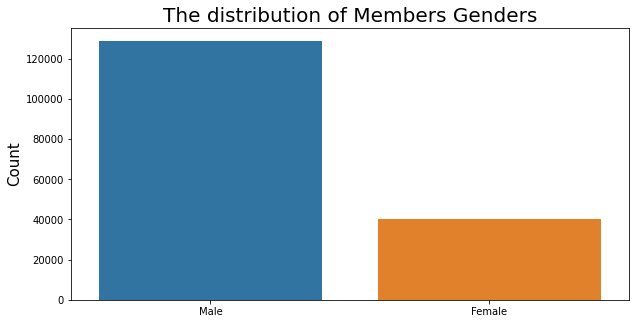

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x='member_gender', data=df)
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.title("The distribution of Members Genders", fontsize = 20)
plt.show()

#### Answer:
The majority of bike riders are males, while a very small portion did not want to specify their gender.

#### Question:
What is the distribution of subscirbers VS customers?

<function matplotlib.pyplot.show(close=None, block=None)>

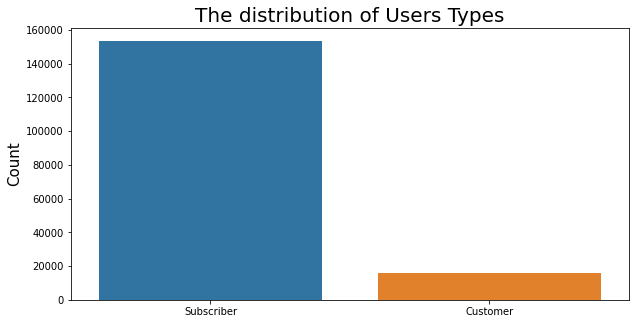

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x='user_type', data=df)
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.title("The distribution of Users Types", fontsize = 20)
plt.show

#### Answer:
We can clearly see here that most of the users are subscribed.

In [33]:
df[["duration_min", "member_gender"]].groupby("member_gender").mean().reset_index()

,member_gender,duration_min
0,Female,11.681984
1,Male,10.345064


#### Question:
Which gender ride for longer times?

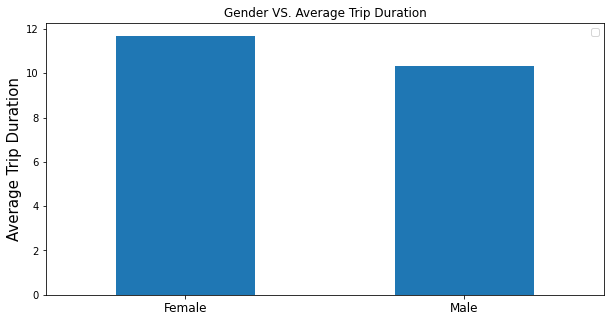

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
df[["duration_min", "member_gender"]].groupby("member_gender").mean().reset_index().plot(kind = "bar", ax = ax)
plt.legend("")
plt.xticks(ticks = range(2), labels = ["Female", "Male"], rotation = 360, fontsize = 12)
plt.ylabel("Average Trip Duration", fontsize = 15)
plt.title("Gender VS. Average Trip Duration")
plt.show()

#### Answer:
Although, the majority of riders are males, the females have a higher trip duration that males.

In [35]:
df[["duration_min", "user_type"]].groupby("user_type").mean().reset_index()

,user_type,duration_min
0,Customer,16.893608
1,Subscriber,10.019661


#### Question
Which user type rides for longer times?

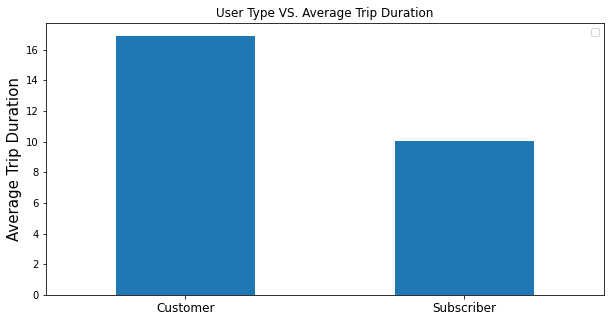

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
df[["duration_min", "user_type"]].groupby("user_type").mean().reset_index().plot(kind = "bar", ax = ax)
plt.legend("")
plt.xticks(ticks = range(2), labels = ["Customer", "Subscriber"], rotation = 360, fontsize = 12)
plt.ylabel("Average Trip Duration", fontsize = 15)
plt.title("User Type VS. Average Trip Duration")
plt.show()

#### Answer:
Customers have a higher average trip duration than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most riders are males, but females ride for longer times. 
Most riders are subscribers, but customers ride for a longer average time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Not really.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Question:
What is the relationship between Age, Trip duration, and gender

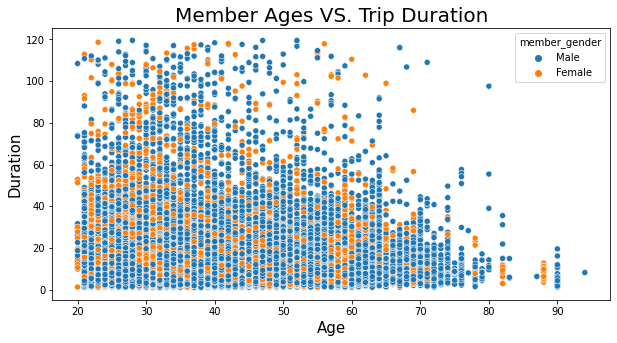

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x="member_age", y = "duration_min", data = df, hue ="member_gender")
plt.title("Member Ages VS. Trip Duration", fontsize = 20)
plt.ylabel("Duration", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

#### Answer:
Younger people ride for longer durations, and the majority of them are males

#### Question:
What is the relationship between Age, Duration, and user type

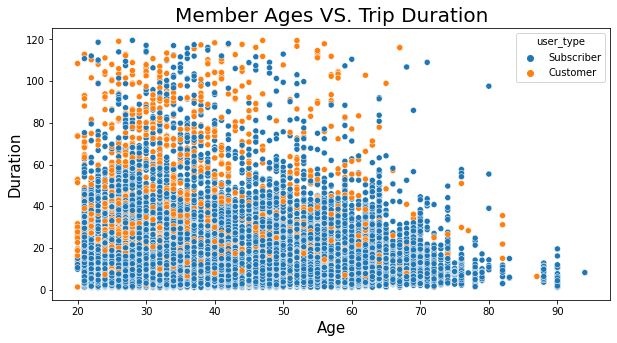

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x="member_age", y = "duration_min", data = df, hue ="user_type")
plt.title("Member Ages VS. Trip Duration", fontsize = 20)
plt.ylabel("Duration", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

#### Answer:
Younger people ride for longer durations, and the majority of them are subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Younger people have a higher duration, and most of them are customers
and females

### Were there any interesting or surprising interactions between features?

> A spike in duration in people who are in their 70's